In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.filters.hp_filter import hpfilter

In [2]:
from pylab import rcParams

In [3]:
rcParams['figure.figsize'] = 12,6

# Video 1

In [4]:
df = pd.read_csv('../Data/macrodata.csv', index_col=0, parse_dates=True)

In [5]:
df.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959-03-31,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1959-06-30,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
1959-09-30,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
1959-12-31,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
1960-03-31,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


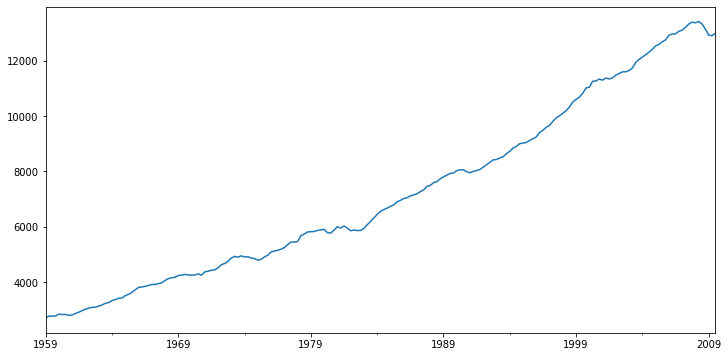

In [6]:
df['realgdp'].plot()

In [7]:
gdp_cycle, gdp_trend = hpfilter(df['realgdp'], lamb=1600)

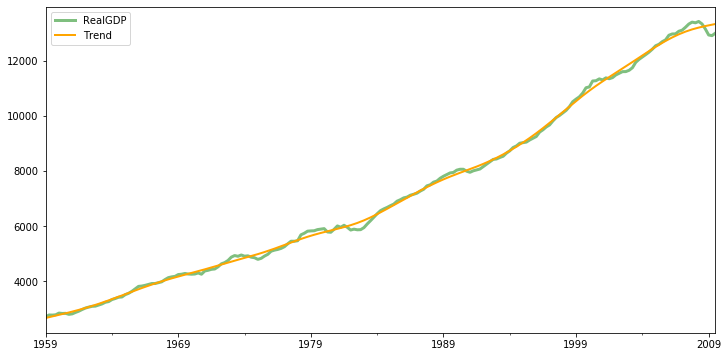

In [8]:
df['realgdp'].plot(color='green', alpha=0.5, label='RealGDP', lw=3)
gdp_trend.plot(color='orange', label='Trend', lw=2)
plt.legend()

In [9]:
df['trend'] = gdp_trend

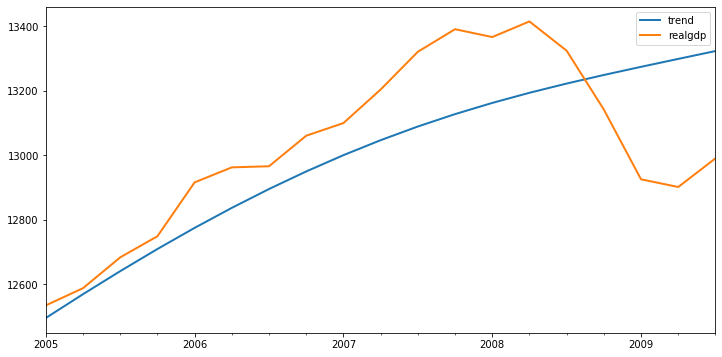

In [10]:
# zoom in
df[['trend', 'realgdp']].loc['2005':].plot( lw=2)

# Video 2

# ETS Decomposition

In [11]:
df = pd.read_csv('../Data/airline_passengers.csv', index_col=0, parse_dates=True)

In [12]:
df.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


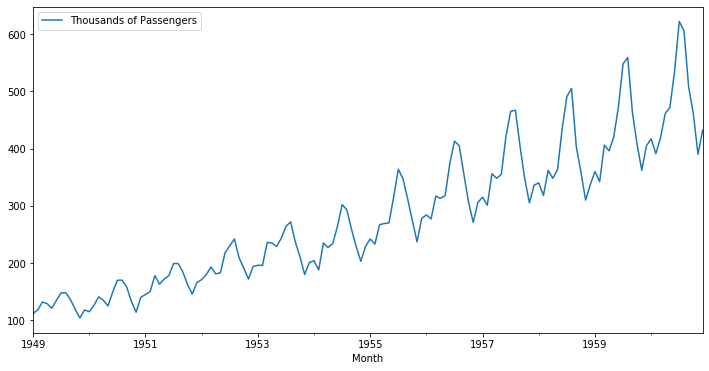

In [13]:
df.plot()

In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [15]:
result = seasonal_decompose(df['Thousands of Passengers'], model='multiplicative')

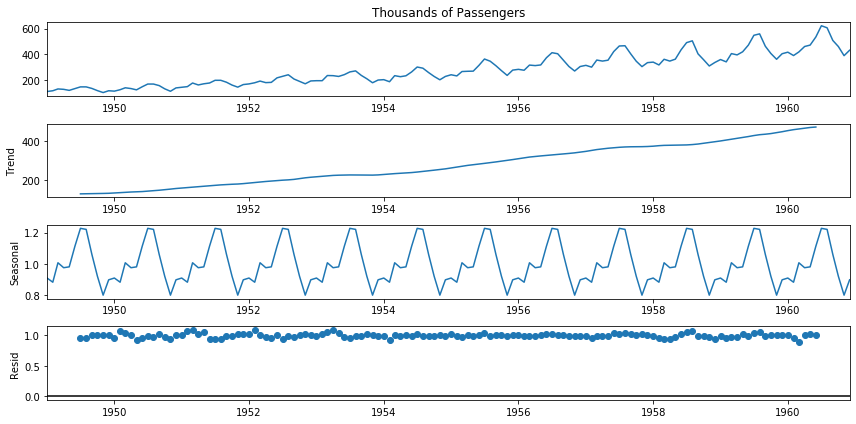

In [16]:
result.plot();

# Video 3

# EWMA

In [17]:
df['6_month_trend'] = df['Thousands of Passengers'].rolling(window=6).mean()
df['12_month_trend'] = df['Thousands of Passengers'].rolling(window=12).mean()


In [18]:
df.tail()

,Thousands of Passengers,6_month_trend,12_month_trend
Month,,,
1960-08-01,606,519.166667,463.333333
1960-09-01,508,534.000000,467.083333
1960-10-01,461,534.000000,471.583333
1960-11-01,390,520.333333,473.916667
1960-12-01,432,503.166667,476.166667


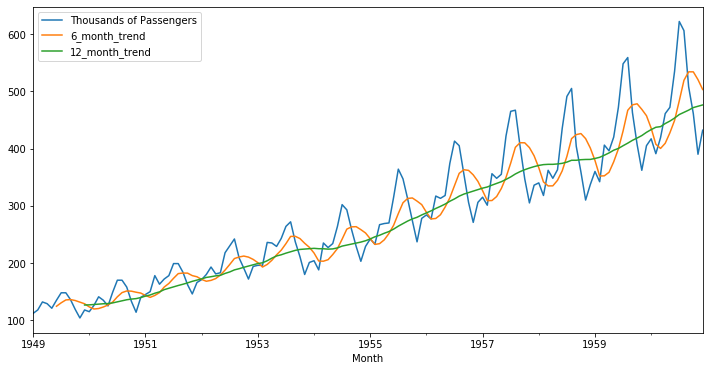

In [19]:
df.plot()

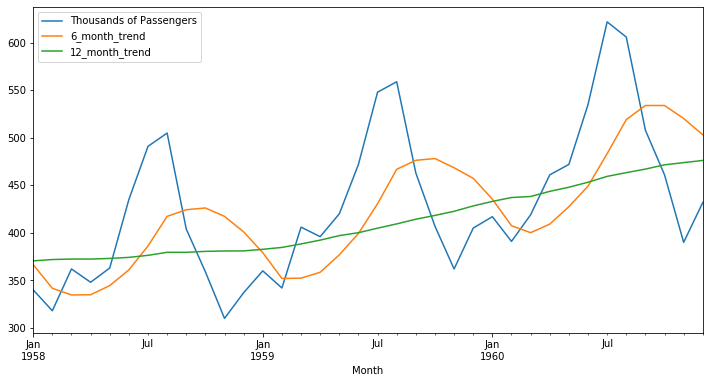

In [20]:
# Zoom in

df.loc['1958':].plot()

In [21]:
# EWMA
df['EWMA_12_months'] = df['Thousands of Passengers'].ewm(span=12).mean()

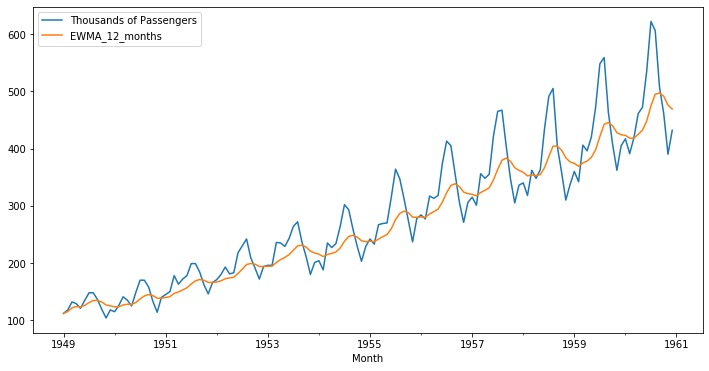

In [22]:
df[['Thousands of Passengers', 'EWMA_12_months']].plot()
plt.autoscale(axis='both')

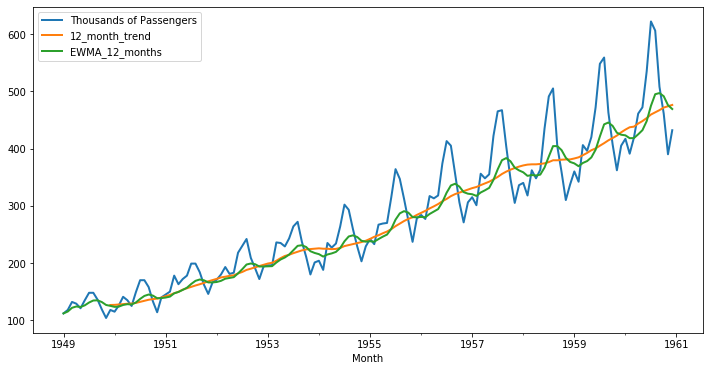

In [23]:
df.drop('6_month_trend', axis=1).plot(lw=2)
plt.autoscale(axis='both')

# Video 4,5 

# Holt- Winters Method

In [24]:
df = pd.read_csv('../Data/airline_passengers.csv', index_col=0, parse_dates=True)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Thousands of Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


In [26]:
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [27]:
df.index.freq = 'MS'

In [28]:
span=12
alpha = 2/(span+1)

In [29]:
df['ewm_12'] = df['Thousands of Passengers'].ewm(alpha=alpha, adjust=False).mean()

In [30]:
# Simple Exponential Smoothing

In [31]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [32]:
model = SimpleExpSmoothing(df['Thousands of Passengers'])

In [33]:
fitted_model = model.fit(smoothing_level=alpha, optimized=False)

In [34]:
df['SES12'] = fitted_model.fittedvalues.shift(-1)

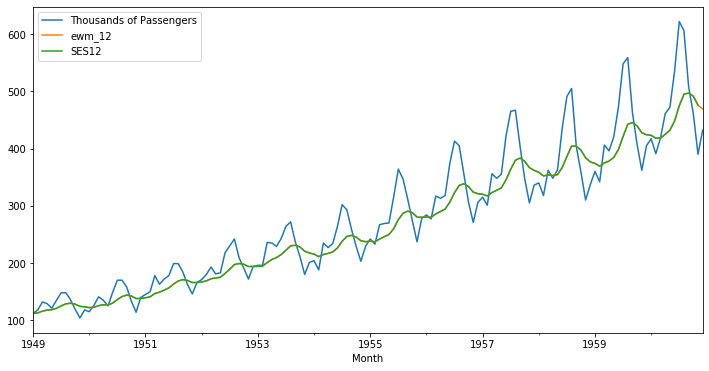

In [35]:
df.plot()

# SES12 and ewm_12 are same

In [36]:
# Double Exponential Smoothing

C:\Users\Fida Hussain\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


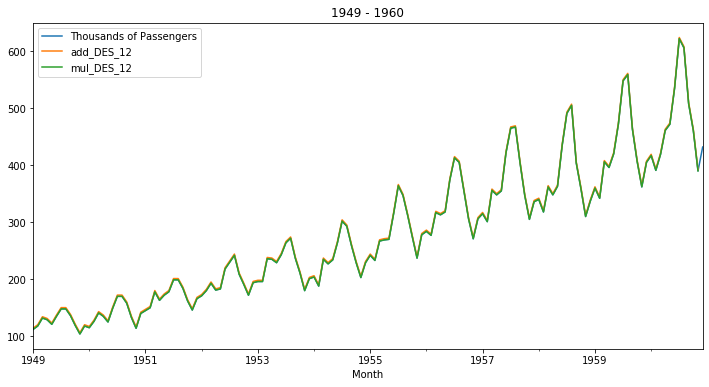

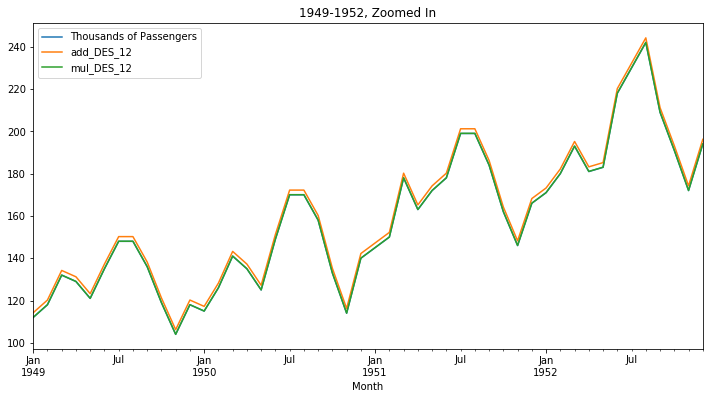

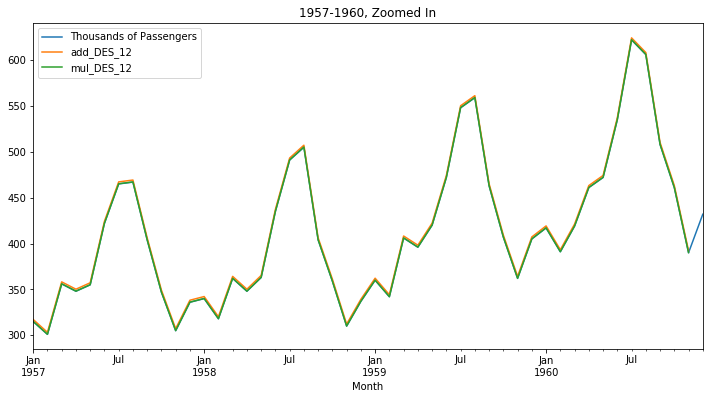

In [37]:
for i in ['add', 'mul']:
    model = ExponentialSmoothing(df['Thousands of Passengers'], trend=i)
    fitted_model = model.fit()
    df[i +'_DES_12'] = fitted_model.fittedvalues.shift(-1)
df.iloc[:, [0,-2,-1]].plot()
plt.title('1949 - 1960')
plt.show()
df.iloc[:, [0, -2,-1]].loc[:'1952'].plot()
plt.title('1949-1952, Zoomed In')
plt.show()
df.iloc[:, [0, -2,-1]].loc['1957':].plot()
plt.title('1957-1960, Zoomed In')
plt.show()

# multiplicative model is performing better hence we will continue forward using it.

In [38]:
# Triple Exponential Smoothing

C:\Users\Fida Hussain\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\Fida Hussain\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


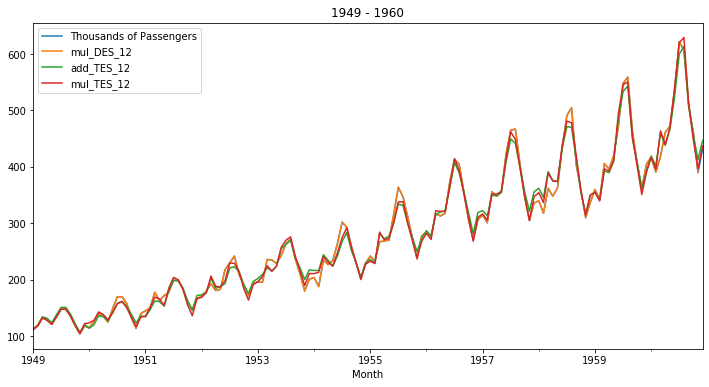

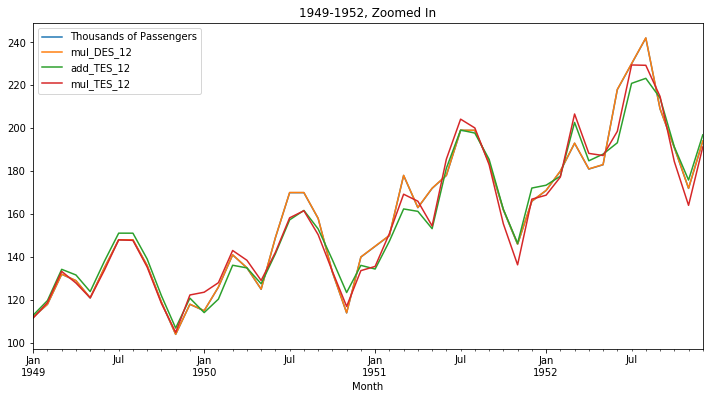

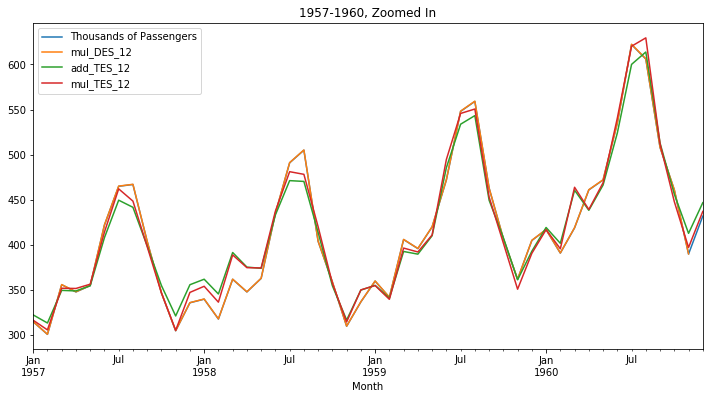

In [39]:
for i in ['add', 'mul']:
    model = ExponentialSmoothing(df['Thousands of Passengers'], trend='mul', seasonal=i, seasonal_periods=12)
    fitted_model = model.fit()
    df[i +'_TES_12'] = fitted_model.fittedvalues
df.iloc[:, [0,-3,-2,-1]].plot()
plt.title('1949 - 1960')
plt.show()
df.iloc[:, [0,-3, -2,-1]].loc[:'1952'].plot()
plt.title('1949-1952, Zoomed In')
plt.show()
df.iloc[:, [0,-3, -2,-1]].loc['1957':].plot()
plt.title('1957-1960, Zoomed In')
plt.show()

In [40]:
# However in the beginning Double exponential model is performing better
# but if we are going to predict future we will prefer the triple exponential model
# since it will eventually perform better towards the end